# Lam Research 株価（日足）

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [2]:
symbol = 'LRCX'
ticker = yf.Ticker(symbol)

df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-05 00:00:00-04:00,74.568513,76.432105,74.313073,75.132065,8197000,0.0,0.0
2024-09-06 00:00:00-04:00,74.794132,75.178778,72.573724,72.936508,15530000,0.0,0.0
2024-09-09 00:00:00-04:00,73.836988,73.963215,71.860092,72.984207,11506000,0.0,0.0
2024-09-10 00:00:00-04:00,73.404635,73.574600,71.225979,72.710884,13518000,0.0,0.0
2024-09-11 00:00:00-04:00,72.754611,76.442044,71.801446,76.218407,22202000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-27 00:00:00-05:00,81.650002,82.169998,76.040001,76.169998,14830200,0.0,0.0
2025-02-28 00:00:00-05:00,76.750000,78.180000,75.370003,76.739998,22608300,0.0,0.0
2025-03-03 00:00:00-05:00,77.940002,79.750000,74.550003,75.779999,14787100,0.0,0.0


## 日足チャートとパラボリック SAR

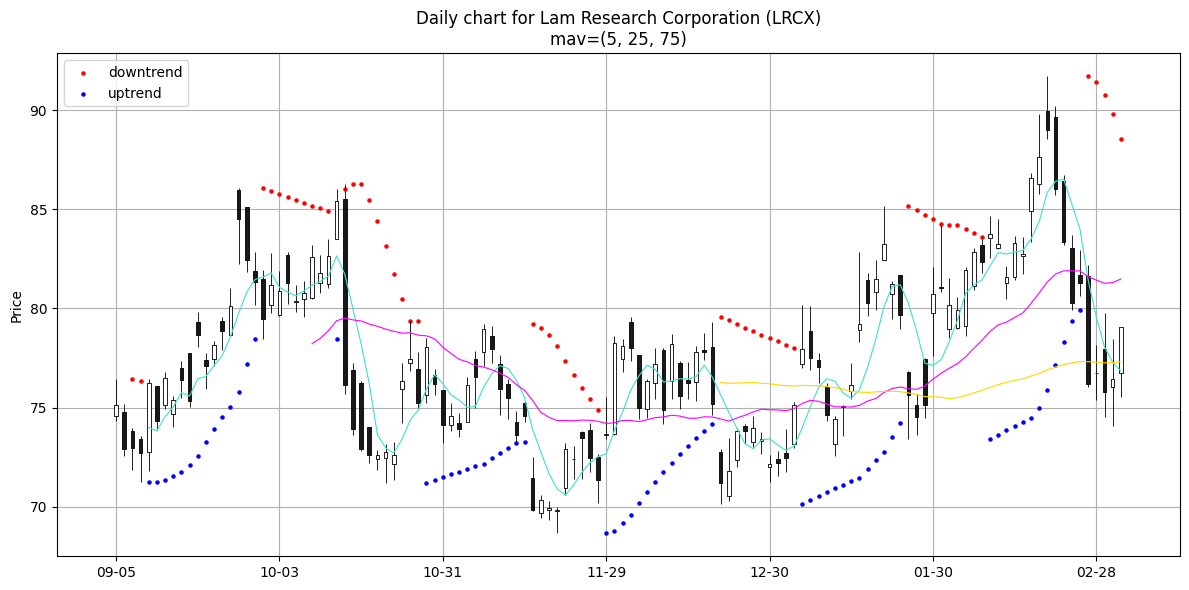

In [3]:
dict_psar = psar(df)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=5,
        color='red',
        label='downtrend',
        ax=ax
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=5,
        color='blue',
        label='uptrend',
        ax=ax
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    mav=(5, 25, 75),
    volume=False,
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
try:
    ax.set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax.grid()

plt.tight_layout()
plt.savefig('daily_chart_LRCX.png')
plt.show()

In [4]:
df.tail(2)['Close']

Date
2024-11-11 00:00:00-05:00    76.169998
2024-11-12 00:00:00-05:00    75.464996
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2024-11-11 00:00:00-05:00         NaN
2024-11-12 00:00:00-05:00   -0.705002
Name: Close, dtype: float64